# Example using the short calendar generation

You can create notebooks to show how to use your package. These will be automatically compiled and run by `mkdocs`, depending on the settings in your `mkdocs.yml` file.

In [1]:
from shortschedule import ScheduleProcessor, XMLWriter
from shortschedule import ScienceCalendar, Visit, ObservationSequence
from shortschedule import parse_science_calendar
from shortschedule.visualizer import ScheduleVisualizer

from astropy.time import Time

In [2]:
# this is an example XML file that lasts for 7 days
xml_file_path = "../src/shortschedule/data/Pandora_science_calendar_20251018_tsb-futz.xml"

In [3]:
# set a start date for the new calendar and duration
window_start = Time("2026-02-06T17:42:00Z")
window_duration_days = 3

# parse the long term calendar XML file
original_calendar = parse_science_calendar(xml_file_path, verbose=True)


# save the original TLE here for testing
# the new TLE has a slightly different number of orbits per day
original_tle1 = "1 99152U 26011B  26005.66013674 +.00000000 +00000-0 +00000-0 0   16"
original_tle2 = "2 99152 97.6750 17.6690 0000000 328.8990 20.9640 14.86530781000004"

new_tle1 = "1 99152U 26011B  26005.66013674 +.00000000 +00000-0 +00000-0 0   16"
new_tle2 = "2 99152 97.6750 17.6690 0000000 328.8990 20.9640 14.865"

# initialize the ScheduleProcessor object
scheduler = ScheduleProcessor(original_tle1, original_tle2)

Parsing XML file: ../src/shortschedule/data/Pandora_science_calendar_20251018_tsb-futz.xml
Root tag: {/pandora/calendar/}ScienceCalendar
Calendar valid from 2026-02-05 00:00:00 to 2027-02-04 09:47:00
Found 10 visits
Successfully parsed 10 visits with 313 total sequences


In [4]:
# create the new calendar

processed_calendar = scheduler.process_calendar(original_calendar,
                           window_start=window_start,
                           window_duration_days = window_duration_days
                           )

In [5]:
# these tests are performed internally but we can also run them explicitly
issues = scheduler.validate_visibility(processed_calendar)
print('visibility issues:', issues)

issues = scheduler.validate_payload_exposures(processed_calendar, report_issues=True)
print('exposure issues:', issues)

# Quick overlap check (like validate_visibility)
overlap_issues = scheduler.validate_no_overlaps_astropy(processed_calendar)
print(f"Found {len(overlap_issues)} overlaps")

# Comprehensive timing validation
all_timing_issues = scheduler.validate_sequence_timing(processed_calendar)

# Quick summary
scheduler.print_timing_summary(processed_calendar)

scheduler.print_gap_summary()


visibility issues: []
exposure issues: []
Found 0 overlaps

SEQUENCE TIMING VALIDATION REPORT
Total sequences analyzed: 138
Total timing issues found: 0

✓ OVERLAPS: None found

✓ SHORT SEQUENCES: None found

✓ LARGE GAPS: None found
✓ All sequence timing validation checks passed

VISIBILITY GAP ANALYSIS SUMMARY

ORIGINAL CALENDAR:
  Total Sequences: 138
  Total Duration: 70.7 hours
  Duty Cycle: 98.1%

PROCESSED CALENDAR:
  Total Sequences: 138
  Total Duration: 72.0 hours
  Duty Cycle: 100.0%

IMPROVEMENTS:
  Duration Gained: 1.4 hours
  Duty Cycle Improved: 1.9%
  Sequences Modified: 0
  Gaps Filled: 35/35


In [6]:
processed_calendar.get_summary_stats()

{'total_visits': 5,
 'total_sequences': np.int64(138),
 'total_duration_minutes': np.float64(4323.0),
 'total_duration_hours': np.float64(72.05),
 'total_duration_days': np.float64(3.002083333333333),
 'calendar_span_days': np.float64(3.002083333333333),
 'duty_cycle_percent': np.float64(100.0),
 'start_date': '2026-02-06T17:57:00.000',
 'end_date': '2026-02-09T18:00:00.000',
 'priority_breakdown': {'priority_0': {'count': 106,
   'duration_hours': np.float64(45.43333333333332),
   'duration_days': np.float64(1.8930555555555553)},
  'priority_1': {'count': 27,
   'duration_hours': np.float64(22.31666666666668),
   'duration_days': np.float64(0.9298611111111117)},
  'priority_2': {'count': 5,
   'duration_hours': np.float64(4.300000000000001),
   'duration_days': np.float64(0.1791666666666667)}}}

In [7]:
# we can write the output file
XMLWriter().write_calendar(processed_calendar, )

'PAN-SCICAL-TST-20251025-VF-20260206-EX-20260209-R001.xml'

/Users/tsbarcl2/gitcode/pandora-short-term-scheduler/src/shortschedule/visualizer.py:1299: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.DayLocator'>
  ax.locator_params(axis='x', nbins=10)


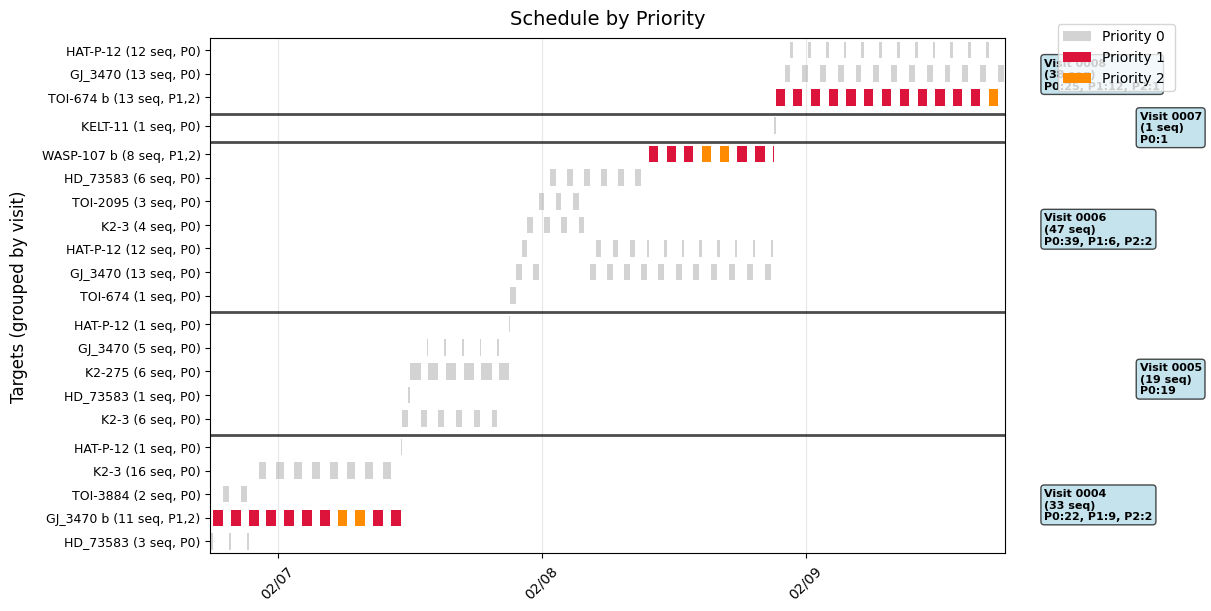

In [8]:
# show some example figures
visualizer = ScheduleVisualizer(scheduler)
priority_fig = visualizer.plot_gantt_timeline_by_priority(
    processed_calendar,
    figsize=(12, 6),  # Smaller size
    show_sequence_labels=False,
    title="Schedule by Priority"
)

Plots and data saved to schedule_analysis_*


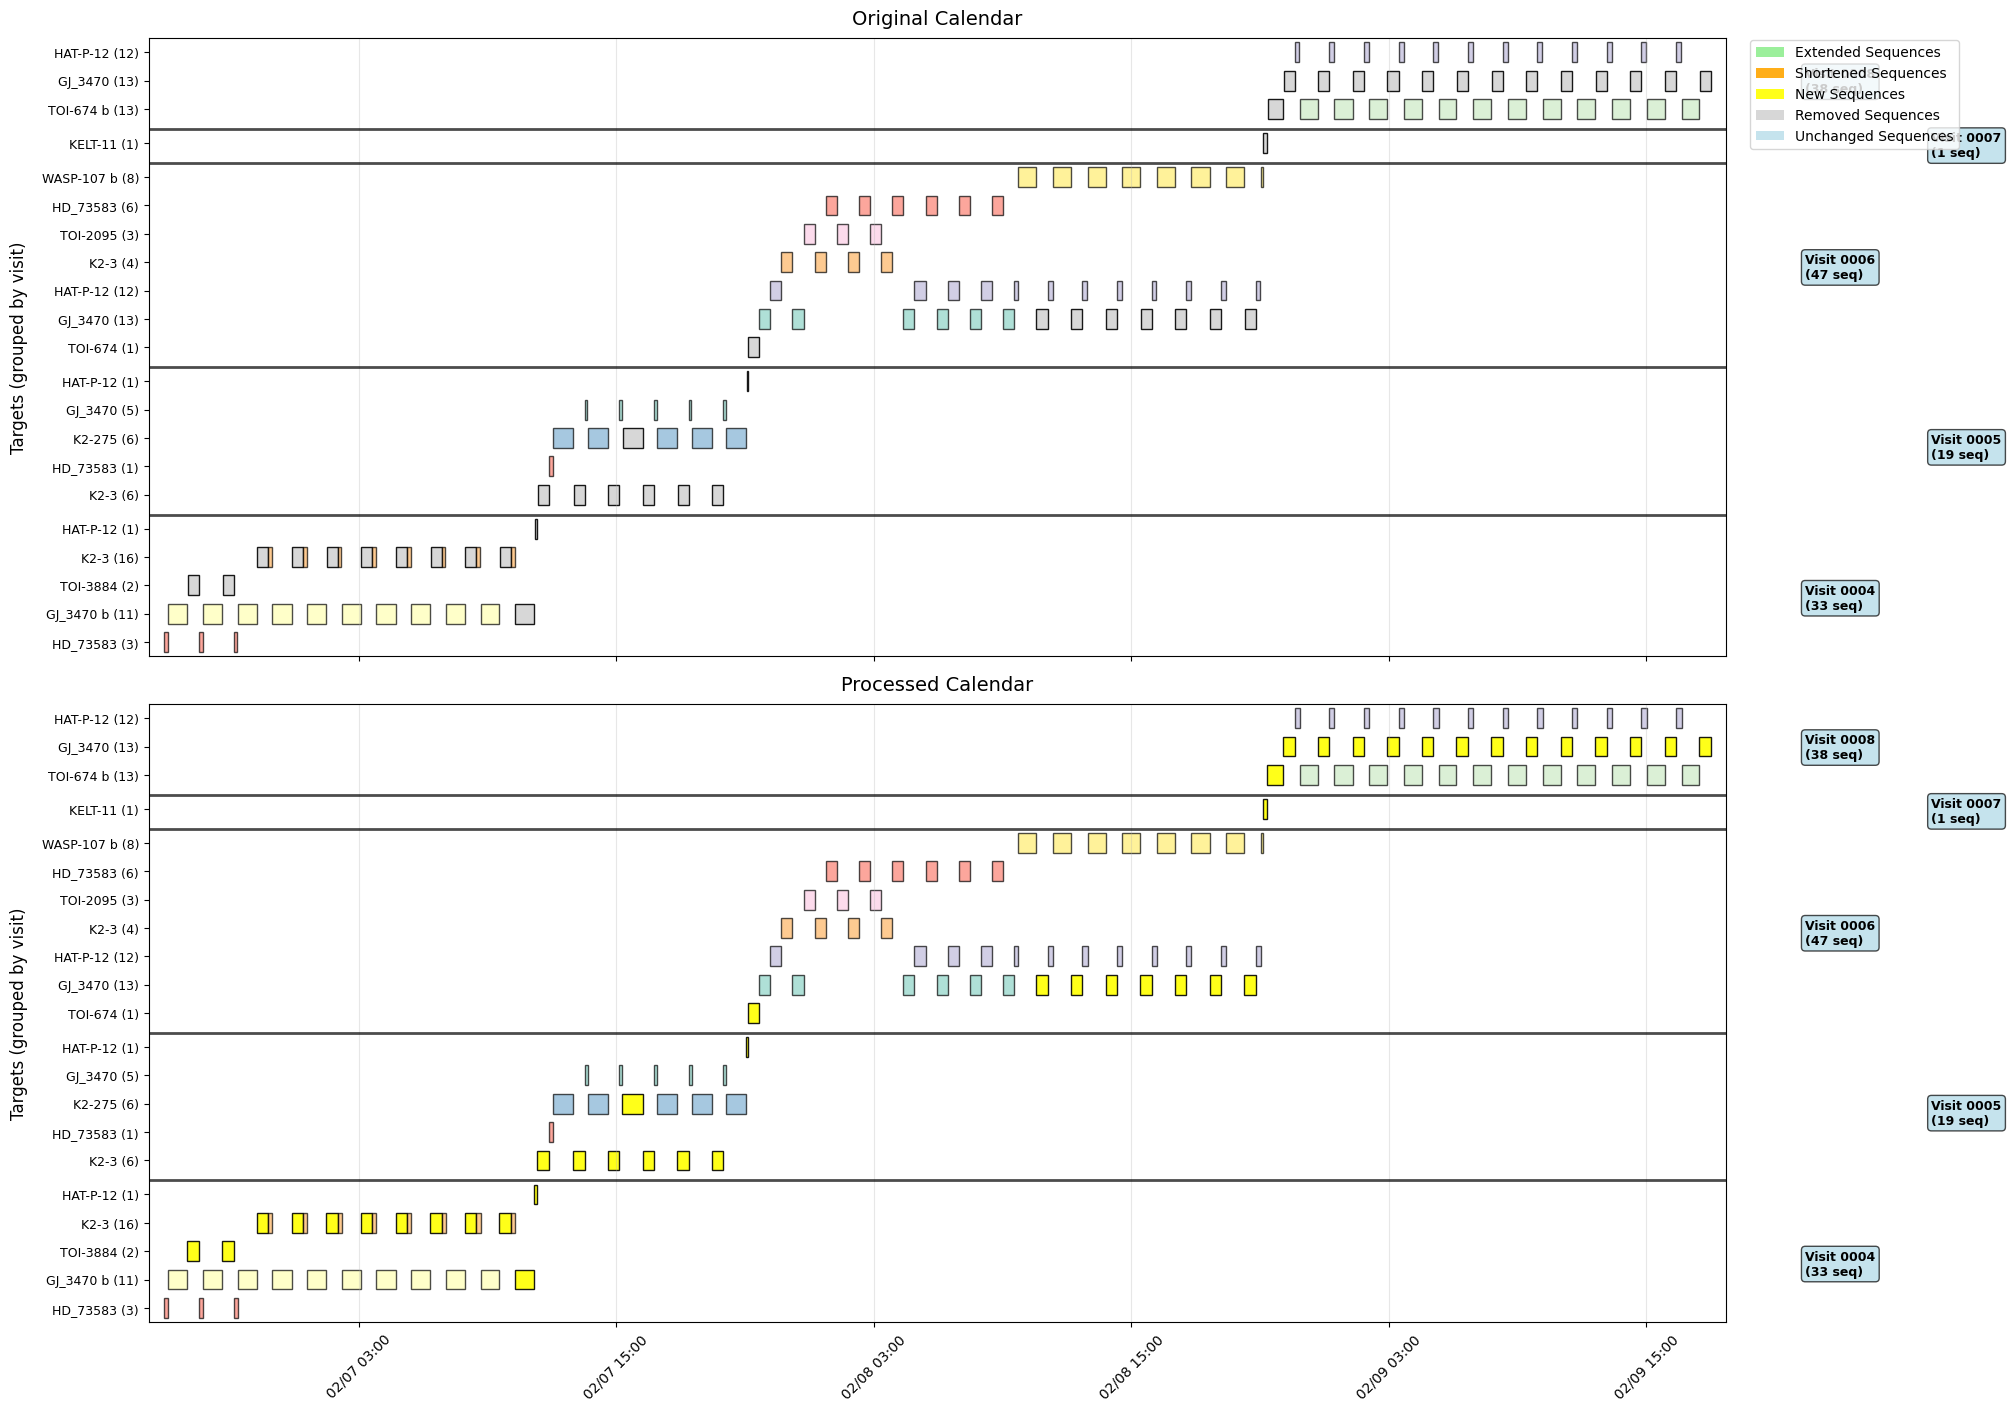

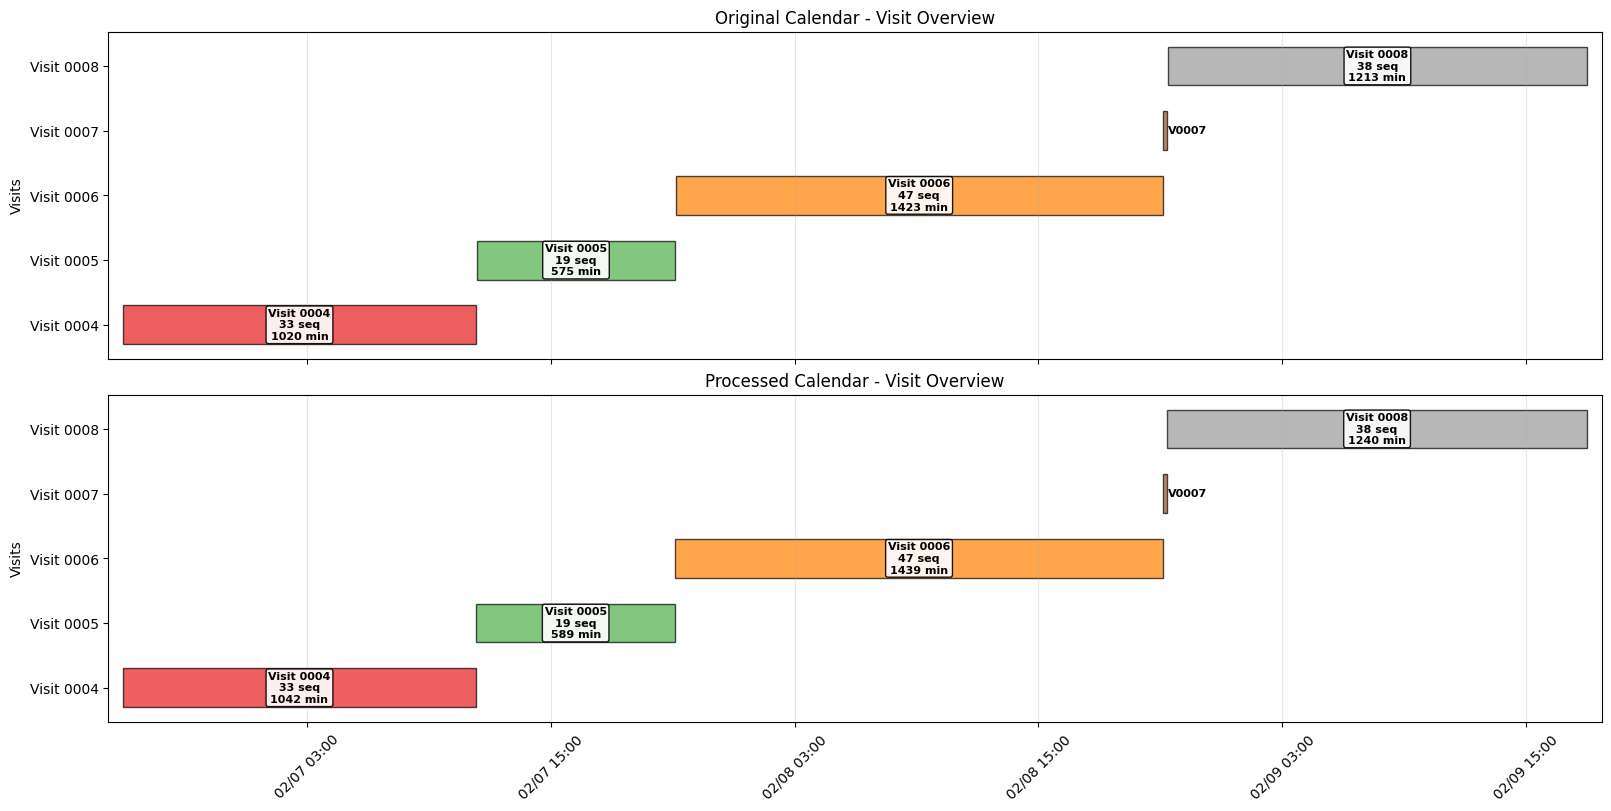

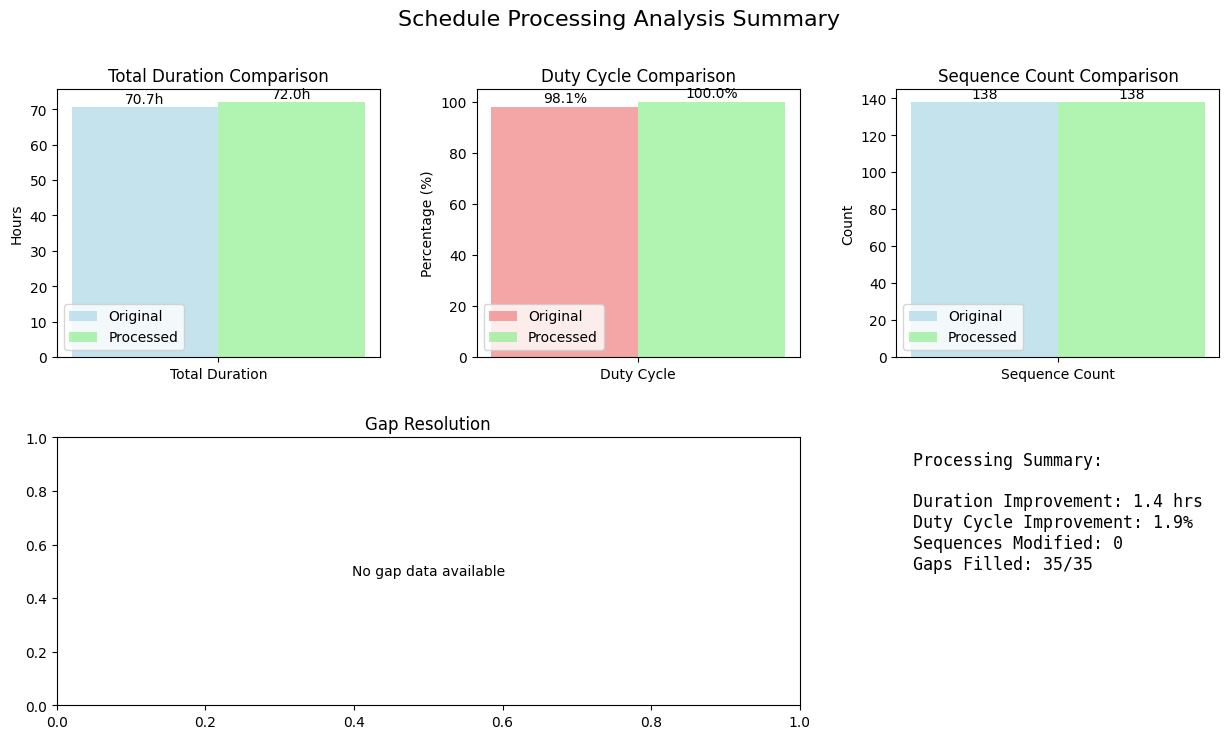

In [9]:
# we can compare before and after

windowed_original = scheduler._extract_time_window(
    original_calendar,
    window_start=window_start,
    window_duration_days=window_duration_days,
    verbose=False
)

gantt_fig, visit_fig, summary_fig, comparison_df = visualizer.generate_full_report(
    windowed_original, 
    processed_calendar,
    save_path="schedule_analysis",
    show_sequence_labels=False,  # Clean look without sequence IDs
    processed_only=False          # Only show processed calendar
)

In [10]:
# there are a lot of helper functions

processed_calendar.visits[0].sequences[0].get_all_payload_parameters()

{'AcquireInfCamImages': {'AverageGroups': '1',
  'ROI_StartX': '1968',
  'ROI_StartY': '824',
  'ROI_SizeX': '80',
  'ROI_SizeY': '400',
  'RiceX': '4',
  'RiceY': '28',
  'SaveImagesToDisk': '1',
  'SendThumbnails': '1',
  'ThumbnailBinSize': '1',
  'ThumbnailCompressionType': '1',
  'TargetID': 'HD_73583b',
  'SC_Resets1': '1',
  'SC_Resets2': '1',
  'SC_DropFrames1': '0',
  'SC_DropFrames2': '16',
  'SC_DropFrames3': '0',
  'SC_ReadFrames': '4',
  'SC_Groups': '6',
  'SC_Integrations': '16'},
 'AcquireVisCamScienceData': {'IncludeFieldSolnsInResp': '1',
  'ROI_StartX': '512',
  'ROI_StartY': '512',
  'ROI_SizeX': '1024',
  'ROI_SizeY': '1024',
  'MaxMagnitudeInQuadCatalog': '15.5',
  'SaveImagesToDisk': '1',
  'RiceX': '5',
  'RiceY': '25',
  'SendThumbnails': '0',
  'TargetID': 'HD_73583b',
  'TargetRA': '129.6881136741847',
  'TargetDEC': '-13.25641580228208',
  'StarRoiDetMethod': '1',
  'numPredefinedStarRois': '9',
  'PredefinedStarRoiRa': {'RA1': '129.688293',
   'RA2': '129.6

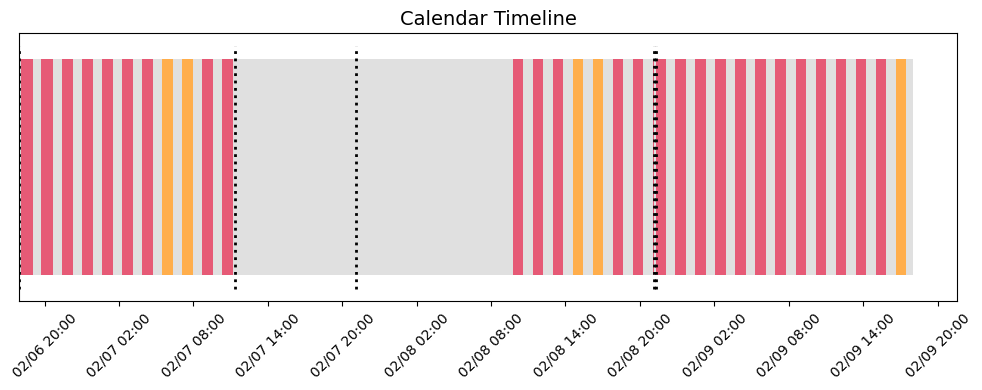

In [11]:
fig, ax = visualizer.plot_timeline(processed_calendar, show_visits=True)

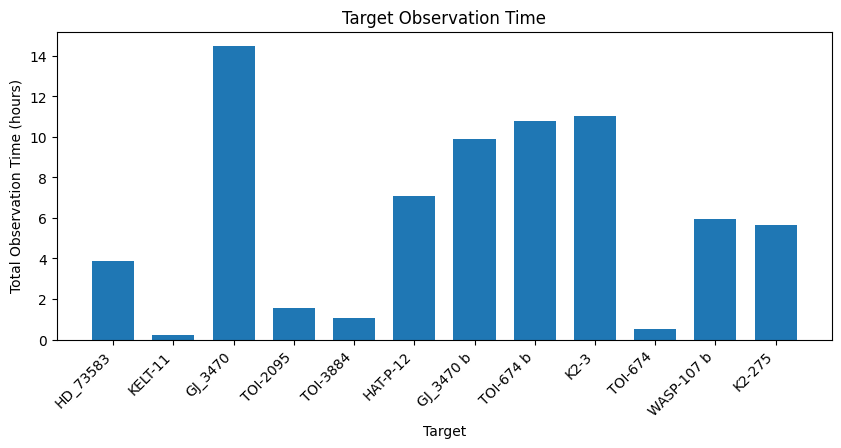

In [12]:
fig, ax = visualizer.plot_target_time(processed_calendar)